In [1]:
import pandas as pd
import seaborn as sns
import json as js

In [2]:
df = pd.read_csv('desafio1.csv')

In [3]:
df.head()

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1


In [4]:
df.shape

(7000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RowNumber                 7000 non-null   int64  
 1   id                        7000 non-null   object 
 2   sobrenome                 7000 non-null   object 
 3   pontuacao_credito         7000 non-null   int64  
 4   estado_residencia         7000 non-null   object 
 5   genero                    7000 non-null   object 
 6   idade                     7000 non-null   int64  
 7   nivel_estabilidade        7000 non-null   int64  
 8   saldo_conta               7000 non-null   float64
 9   numero_produtos           7000 non-null   int64  
 10  possui_cartao_de_credito  7000 non-null   int64  
 11  membro_ativo              7000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 656.4+ KB


# Existe correação forte positiva entre pontuação de crédito e o saldo da conta?

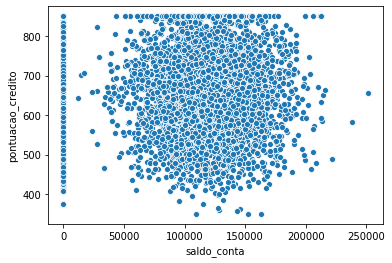

In [6]:
sns.scatterplot(x = 'saldo_conta', y = 'pontuacao_credito', data = df)

In [7]:
df[['saldo_conta', 'pontuacao_credito']].corr()

,saldo_conta,pontuacao_credito
saldo_conta,1.000000,0.009761
pontuacao_credito,0.009761,1.000000


In [8]:
df['estado_residencia'].value_counts()

SC    3519
RS    1750
PR    1731
Name: estado_residencia, dtype: int64

In [10]:
info_estados =  df.groupby('estado_residencia')['pontuacao_credito'].agg([pd.Series.mode, 'median', 'mean', 'std'])
info_estados

,mode,median,mean,std
estado_residencia,,,,
PR,850,650,648.961294,98.607186
RS,850,650,651.105143,95.136598
SC,850,653,649.537653,97.233493


In [11]:
info_estados.rename(columns = {'mode':'moda', 'median':'mediana', 'mean':'media', 'std':'desvio_padrao'}, inplace = True)

In [12]:
print(info_estados)

moda  mediana       media  desvio_padrao
estado_residencia                                          
PR                  850      650  648.961294      98.607186
RS                  850      650  651.105143      95.136598
SC                  850      653  649.537653      97.233493


In [13]:
info_estados.sort_index(ascending= False).to_json('submission.json', orient='index')

In [14]:
estados = list(df['estado_residencia'].unique())

In [15]:
estados

['SC', 'RS', 'PR']

In [35]:
for estado in estados:
    aux = df[df['estado_residencia'] == estado]
    print(estado)
    print(aux['pontuacao_credito'].mean())
    print(aux['pontuacao_credito'].median())
    print(aux['pontuacao_credito'].mode()[0])
    print(aux['pontuacao_credito'].std())

SC
649.5376527422563
653.0
850
97.23349279343306
RS
651.1051428571428
650.0
850
95.1365984138357
PR
648.9612940496822
650.0
850
98.60718591309772
